In [1]:
#Import all the required libraries
import os
import tarfile
from six.moves import urllib
import ssl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import Imputer

ImportError: cannot import name 'imputer' from 'sklearn.preprocessing' (/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/__init__.py)

In [102]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"


In [103]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
        print("data set directory created...")
    tgz_path = os.path.join(housing_path,"housing.tgz")
    # Essentially what this does is make your request "secure"
    # so the HTTPS site will actually accept the request coming from python.
    # You should always do this before trying to access a site with the https prefix.
    ssl._create_default_https_context = ssl._create_unverified_context
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    print("data set extracted...")    


In [104]:
fetch_housing_data()

data set extracted...


In [105]:
def load_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path) #this function returns a Pandas dataframe object

In [106]:
housing = load_data()
print("housing data loaded...")
housing.info()
housing["ocean_proximity"].value_counts()
housing.describe()

housing data loaded...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<AxesSubplot:>

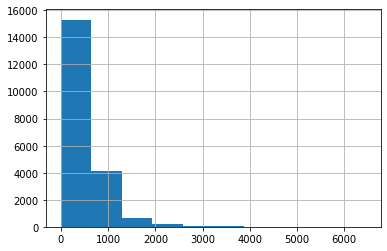

In [107]:
#plotting the data
%matplotlib inline
#housing.hist(bins=50, figsize=(20,15))
#plt.show()
total_bedrooms = housing["total_bedrooms"]
total_bedrooms.hist()



<AxesSubplot:>

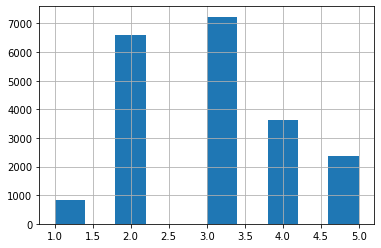

In [108]:
#data splitting into test and traing
housing["income_cat"] = np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
housing["income_cat"].hist()




<AxesSubplot:xlabel='longitude', ylabel='latitude'>

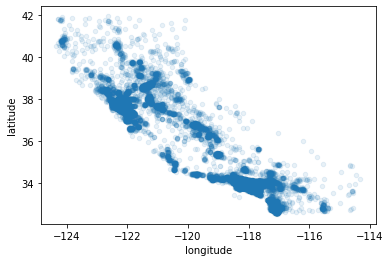

In [109]:
split = StratifiedShuffleSplit(n_splits =1, test_size =0.2, random_state=42)
for train_index, test_index in split.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

#you can also generate the test data using sample randome method.abs

#once the sampling is done using the field that you want- you can drop that field if it was created specially for the split

for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)
 
housing =  strat_train_set.copy()

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)   


In [110]:
# from the train data drop the median_house_value as this is the label and not a feautre
housing = strat_train_set.drop("median_house_value", axis=1)
housing_label = strat_train_set["median_house_value"].copy()
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [2]:
#Data cleaning
#1. Fixing missing values- 3 options
#a. Get rid of corresponding districts housing.dropna(subset=["total_bedrooms"])
#b. Get rid of whole attribute housing.drop("total_bedrooms", axis=1)
#c. Set the missing values by some value like 0, median, mean 

imputer = Imputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
imputer.statistics_

NameError: name 'Imputer' is not defined